<font size="5" color="green"><b> Feature Selection Techniques Easily - Explained Machine Learning </b></font>

Tutorial made from 'Feature Selection Techniques Easily - Explained Machine Learning' (Krish Naik) by Marcus Mariano

**Feature Selection Techniques Easily: Explained Machine Learning [here.](https://www.youtube.com/watch?v=EqLBAmtKMnQ&t=691s)** 

# Feature Selection


## 3 Feature selection techniques that are easy to use and also gives good results.

1. Univariate Selection

2. Feature Importance

3. Correlation Matrix with Heatmap

1. 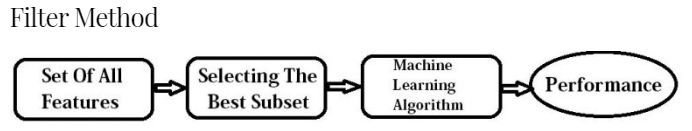

2. 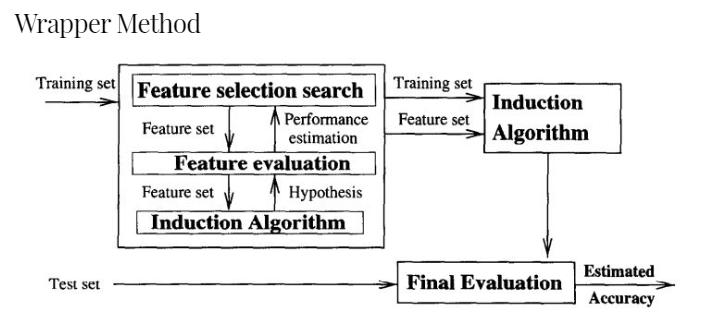


1. __Forward Selection__: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

2. __Backward Elimination__: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

3. __Recursive Feature elimination__: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

3. 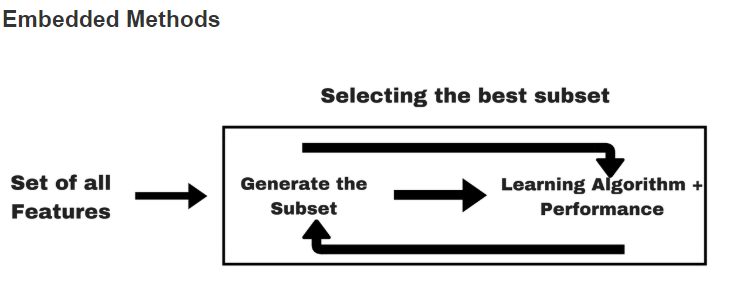

## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.



# import Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

In [2]:
data = pd.read_csv("data/train.csv")
print(data.shape)
data.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Exploratory Data Analysis (EDA) 

In [3]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

# Data Transformation

## Create X, y variables

In [7]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
X.shape, y.shape

((2000, 20), (2000,))

## Division of training and validation databases

In [8]:
from sklearn.model_selection import train_test_split

SEED = 0

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y, 
                                                      test_size=0.3, 
                                                      random_state=SEED) 


print(f"Train 70%, Valid 30% data: {X_train.shape, X_valid.shape}",\
                                    y_train.shape, y_valid.shape)

Train 70%, Valid 30% data: ((1400, 20), (600, 20)) (1400,) (600,)


## Base line Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# rfc.fit(X_train_smote, y_train_smote)

preds_rfc = rfc.predict(X_valid)

#  Classification Report, Accuracy and Confusin Matrix
from sklearn.metrics import log_loss, accuracy_score, classification_report, f1_score

f1 = f1_score(y_valid, preds_rfc, average='weighted')
# loss = log_loss(y_valid, preds_rfc)
accuracy = accuracy_score(y_valid, preds_rfc)
report = classification_report(y_valid, preds_rfc)

# F1 Score
print(f'F1 Score: {f1:.3f}')
# Log Loss
# print(f'Log Loss: {loss}')
# Accuracy score
print(f'Accuracy Score: {accuracy}')
print('\n')
# Classification Report
print(f'Classification Report:\n\n {report}')

F1 Score: 0.868
Accuracy Score: 0.8683333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       151
           1       0.81      0.80      0.81       135
           2       0.79      0.77      0.78       151
           3       0.91      0.92      0.92       163

    accuracy                           0.87       600
   macro avg       0.86      0.87      0.86       600
weighted avg       0.87      0.87      0.87       600



# Univariate Selection - SelectKBest

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
#apply SelectKBest class to extract top 10 best features
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(X, y)


In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [13]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [14]:
featureScores.sort_values('Score', ascending=False)

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [15]:
print(featureScores.nlargest(12, 'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


In [16]:
#print 12 best features names
print(featureScores.nlargest(12, 'Score')['Specs'].values)  

['ram' 'px_height' 'battery_power' 'px_width' 'mobile_wt' 'int_memory'
 'sc_w' 'talk_time' 'fc' 'sc_h' 'pc' 'n_cores']


In [18]:
best_features = list(featureScores.nlargest(12, 'Score')['Specs'].values)
len(best_features)

12


## Division of training and validation databases

In [19]:
from sklearn.model_selection import train_test_split

SEED = 0

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_valid, y_train, y_valid = train_test_split(X[best_features],
                                                      y, 
                                                      test_size=0.3, 
                                                      random_state=SEED) 


print(f"Train 70%, Valid 30% data: {X_train.shape, X_valid.shape}",\
                                    y_train.shape, y_valid.shape)


Train 70%, Valid 30% data: ((1400, 12), (600, 12)) (1400,) (600,)


## Random Forest Model with SelectKBest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# rfc.fit(X_train_smote, y_train_smote)

preds_rfc = rfc.predict(X_valid)

#  Classification Report, Accuracy and Confusin Matrix
from sklearn.metrics import log_loss, accuracy_score, classification_report, f1_score

f1 = f1_score(y_valid, preds_rfc, average='weighted')
# loss = log_loss(y_valid, preds_rfc)
accuracy = accuracy_score(y_valid, preds_rfc)
report = classification_report(y_valid, preds_rfc)

# F1 Score
print(f'F1 Score: {f1:.3f}')
# Log Loss
# print(f'Log Loss: {loss}')
# Accuracy score
print(f'Accuracy Score: {accuracy}')
print('\n')
# Classification Report
print(f'Classification Report:\n\n {report}')


F1 Score: 0.887
Accuracy Score: 0.8883333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.98      0.96       151
           1       0.85      0.83      0.84       135
           2       0.83      0.79      0.81       151
           3       0.91      0.94      0.93       163

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



# Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
ext_tree = ExtraTreesClassifier()
ext_tree.fit(X,y)

ExtraTreesClassifier()

In [26]:
print(ext_tree.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.06087041 0.01966577 0.03230007 0.01971991 0.03226191 0.01681777
 0.03566178 0.03358122 0.03590721 0.0338185  0.03475255 0.047252
 0.04854256 0.39429915 0.03309444 0.03389521 0.03439376 0.01445939
 0.01844742 0.02025896]


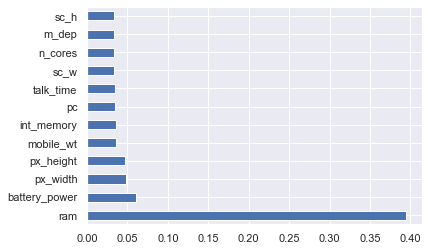

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(ext_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt;

In [28]:
feat_importances.nlargest(12).index

Index(['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt',
       'int_memory', 'pc', 'talk_time', 'sc_w', 'n_cores', 'm_dep', 'sc_h'],
      dtype='object')

In [29]:
feat_import = list(feat_importances.nlargest(12).index)
len(feat_import)

12

## 2  Division of training and validation databases for Feature Importance

In [30]:
from sklearn.model_selection import train_test_split

SEED = 0

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_valid, y_train, y_valid = train_test_split(X[feat_import],
                                                      y, 
                                                      test_size=0.3, 
                                                      random_state=SEED) 


print(f"Train 70%, Valid 30% data: {X_train.shape, X_valid.shape}",\
                                    y_train.shape, y_valid.shape)


Train 70%, Valid 30% data: ((1400, 12), (600, 12)) (1400,) (600,)


## Random Forest Model with  for Feature Importance

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

preds_rfc = rfc.predict(X_valid)

#  Classification Report, Accuracy and Confusin Matrix
from sklearn.metrics import log_loss, accuracy_score, classification_report, f1_score

f1 = f1_score(y_valid, preds_rfc, average='weighted')
# loss = log_loss(y_valid, preds_rfc)
accuracy = accuracy_score(y_valid, preds_rfc)
report = classification_report(y_valid, preds_rfc)

# F1 Score
print(f'F1 Score: {f1:.3f}')
# Log Loss
# print(f'Log Loss: {loss}')
# Accuracy score
print(f'Accuracy Score: {accuracy}')
print('\n')
# Classification Report
print(f'Classification Report:\n\n {report}')

F1 Score: 0.883
Accuracy Score: 0.8833333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.84      0.84      0.84       135
           2       0.81      0.81      0.81       151
           3       0.93      0.91      0.92       163

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

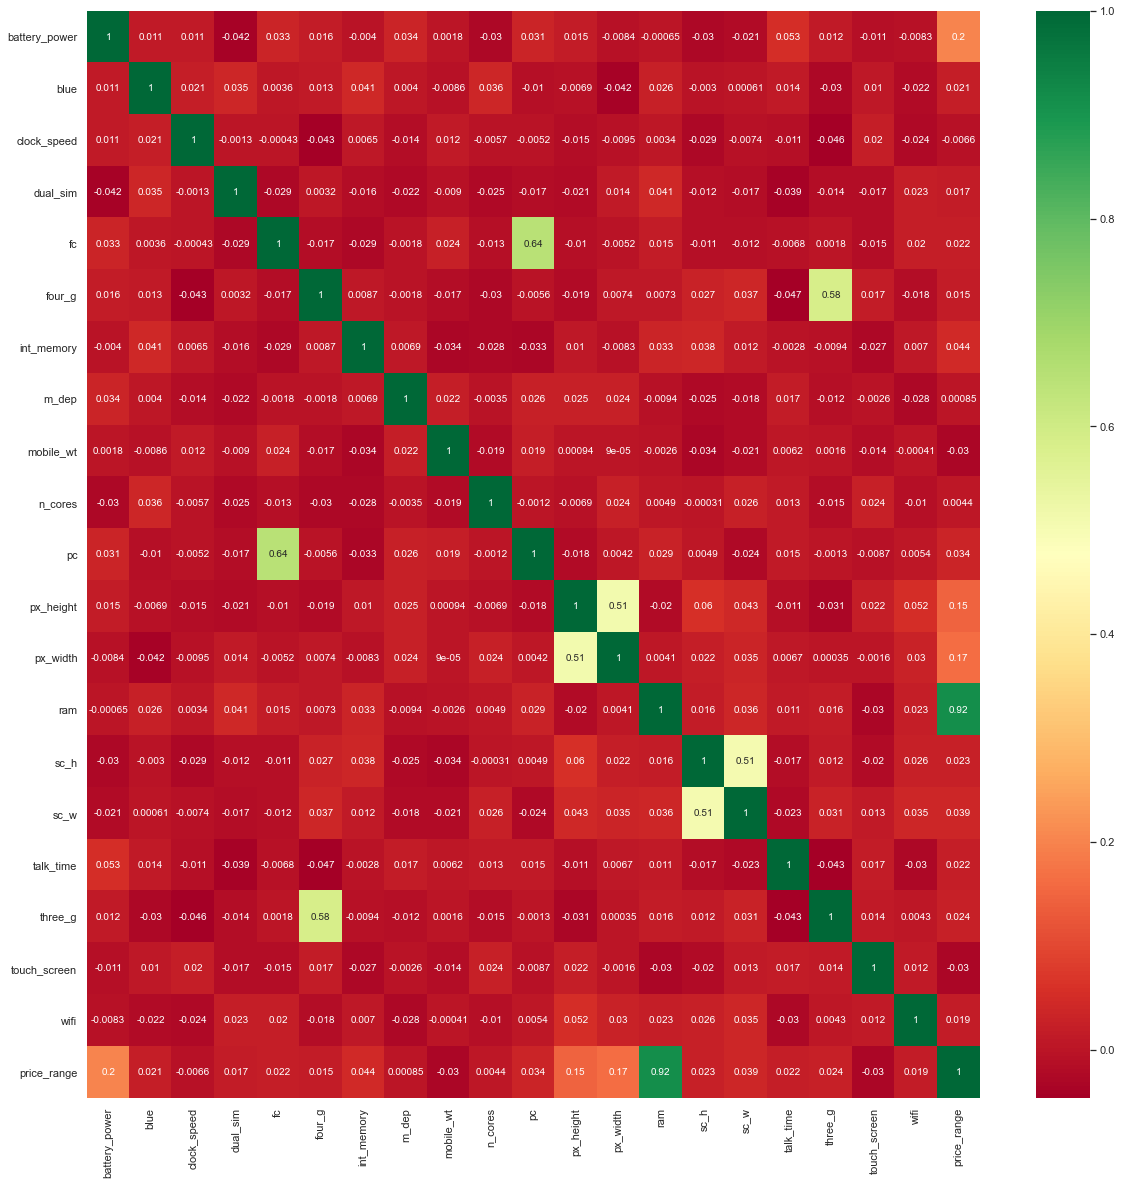

In [32]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")